In [ ]:
!pip install torch torchvision transformers pillow matplotlib

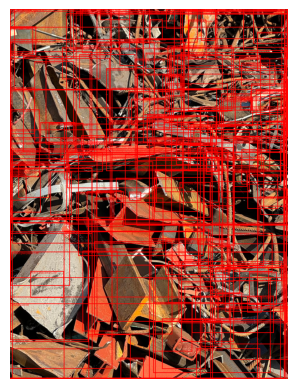

In [13]:
import torch
from transformers import OwlViTProcessor, OwlViTForObjectDetection
from PIL import Image, ImageDraw
import requests
import matplotlib.pyplot as plt

# 🔹 Load Pretrained OWLv2 Model & Processor
model_name = "google/owlvit-base-patch32"  # Choose base model
processor = OwlViTProcessor.from_pretrained(model_name)
model = OwlViTForObjectDetection.from_pretrained(model_name)

# 🔹 Load an Image (Replace with your own image URL or file)
image_url = "/content/IMG-20241113-WA1200.jpg"
image = Image.open(image_url)

# 🔹 Define Text Prompts for Object Detection
text_queries = [["rusty iron sheet", "crushed aluminum can", "shredded plastic waste", "broken glass pieces"]]


# 🔹 Preprocess the Image
inputs = processor(images=image, text=text_queries, return_tensors="pt")

# 🔹 Run Object Detection
with torch.no_grad():
    outputs = model(**inputs)

# 🔹 Process Output Data (Bounding Boxes, Scores, Labels)
target_sizes = torch.tensor([image.size[::-1]])  # Convert to (H, W)
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.002)  # Set a detection threshold

# 🔹 Draw Bounding Boxes on Image
draw = ImageDraw.Draw(image)
for box, score, label in zip(results[0]["boxes"], results[0]["scores"], results[0]["labels"]):
    box = [round(i, 2) for i in box.tolist()]
    draw.rectangle(box, outline="red", width=3)
    draw.text((box[0], box[1]), f"{text_queries[0][label]}: {score:.2f}", fill="red")

# 🔹 Display Image with Detections
plt.imshow(image)
plt.axis("off")
plt.show()


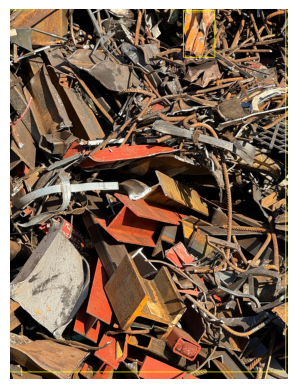

In [19]:
import torch
from transformers import OwlViTProcessor, OwlViTForObjectDetection
from PIL import Image, ImageDraw
import requests
import matplotlib.pyplot as plt

# 🔹 Load Pretrained OWLv2 Model & Processor
model_name = "google/owlvit-large-patch14"  # Choose base model
processor = OwlViTProcessor.from_pretrained(model_name)
model = OwlViTForObjectDetection.from_pretrained(model_name)

# 🔹 Load an Image (Replace with your own image URL or file)
image_url = "/content/IMG-20241113-WA1200.jpg"
image = Image.open(image_url)

# 🔹 Define Text Prompts for Object Detection
text_queries = [["rusty iron sheet", "crushed aluminum can", "shredded plastic waste", "broken glass pieces"]]

# 🔹 Define Colors for Each Class
class_colors = {
    "rusty iron sheet": "red",
    "crushed aluminum can": "blue",
    "shredded plastic waste": "green",
    "broken glass pieces": "yellow"
}

# 🔹 Preprocess the Image
inputs = processor(images=image, text=text_queries, return_tensors="pt")

# 🔹 Run Object Detection
with torch.no_grad():
    outputs = model(**inputs)

# 🔹 Process Output Data (Bounding Boxes, Scores, Labels)
target_sizes = torch.tensor([image.size[::-1]])  # Convert to (H, W)
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.2)  # Set a detection threshold

# 🔹 Draw Bounding Boxes on Image with Different Colors
draw = ImageDraw.Draw(image)

for box, score, label in zip(results[0]["boxes"], results[0]["scores"], results[0]["labels"]):
    box = [round(i, 2) for i in box.tolist()]
    class_name = text_queries[0][label]  # Get class name from text queries
    color = class_colors.get(class_name, "white")  # Default to white if class not found

    draw.rectangle(box, outline=color, width=3)
    draw.text((box[0], box[1]), f"{class_name}: {score:.2f}", fill=color)

# 🔹 Display Image with Detections
plt.imshow(image)
plt.axis("off")
plt.show()
